# 감정 분석(Sentiment Analysis)

* 감정 분석은 텍스트에 등장하는 단어들을 통해 어떤 감정이 드러나는지 분석하는 기법
* 감정 분석은 오피니언 마이닝으로도 불리며, 텍스트에 담긴 의견, 태도 등을 알아보는데 유용한 기법
* 감정 분석을 하기 위해선 미리 정의된 감정 어휘 사전이 필요
* 감정 어휘 사전에 포함된 어휘가 텍스트에 얼마나 분포하는지에 따라 해당 텍스트의 감정이 좌우
* 토픽 모델링이 텍스트의 주제를 찾아낸다면, 감정 분석은 텍스트의 의견을 찾아냄
* 텍스트는 주제(토픽)와 의견(감정)의 결합으로 이루어졌다고 볼 수 있음

![2655364B5925AC9606[1].png](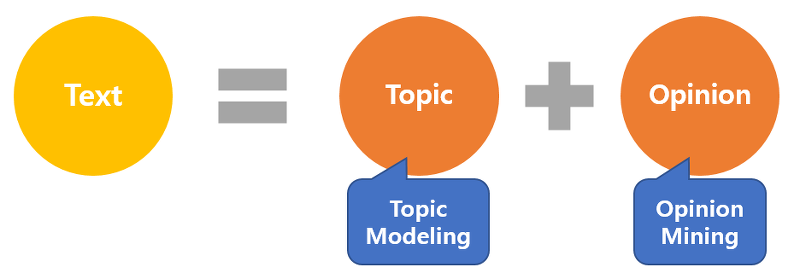)

* 감정 분석은 SNS, 리뷰 분석에 유용하게 사용할 수 있음
* 특정 이슈에 대한 사람들의 감정을 실시간으로 분석한다면, 그에 대해 신속하게 대처 가능

* 파이썬으로 감정 분석하는 방법은 크게 두 가지로 구분
  + 감정 어휘 사전을 이용한 감정 상태 분류
    -  미리 분류해둔 감정어 사전을 통해 분석하고자 하는 텍스트의 단어들을 사전에 기반해 분류하고, 그 감정가를 계산
    - 이 때 사용되는 감정어 사전에는 해당 감정에 해당되는 단어를 미리 정의해둬야 함
  + 기계학습을 이용한 감정 상태 분류
    - 분석 데이터의 일부를 훈련 데이터로 사용해 그로부터 텍스트의 감정 상태를 분류
    - 이 때 사용되는 훈련 데이터는 사용자가 분류한 감정 라벨이 포함되어 있어야 하며,  
이를 인공 신경망, 의사 결정 트리 등의 기계 학습 알고리즘을 사용하여 분류

## 감정 어휘 사전을 이용한 감정 상태 분류

### 감정 사전 준비

*   감정 사전 라이브러리를 설치
*   afinn은 영어에 대한 긍정, 부정에 대한 감정 사전을 제공


In [1]:
!pip install afinn

### 데이터 준비

1.   사용할 데이터를 구성
2.   데이터는 사이킷런에 내장되어 있는 뉴스그룹 데이터를 이용

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsdata = fetch_20newsgroups(subset='train')
newsdata.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [3]:
from afinn import Afinn

afinn = Afinn()
for i in range(10):
  print(afinn.score(newsdata.data[i]))

7.0
11.0
16.0
5.0
-23.0
-25.0
7.0
3.0
16.0
-20.0


### 감정 상태 분류 및 시각화

*   감정 사전을 구성하고 감정 스코어를 측정
*   afinn 라이브러리는 감정 사전과 더불어 편리하게 감정가를 계산할 수 있는 함수를 제공

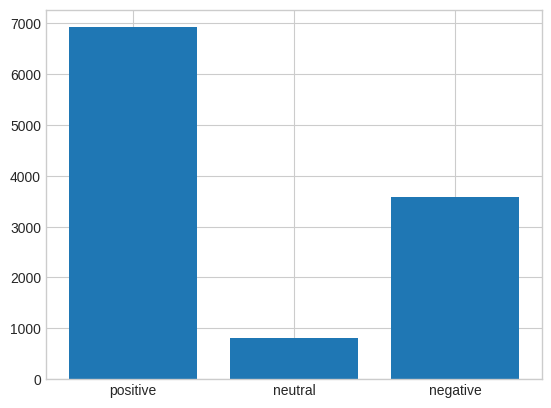

In [4]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

positive = 0
neutral = 0
negative = 0

for i in newsdata.data:
  score = afinn.score(i)
  if score > 0:
    positive += 1
  elif score == 0:
    neutral += 1
  else:
    negative += 1

plt.bar(np.arange(3), [positive, neutral, negative])
plt.xticks(np.arange(3), ['positive', 'neutral', 'negative'])
plt.show()

*   모든 뉴스에 대한 감정을 시각화
*   긍정과 부정에 대한 갯수를 시각화



## 기계학습을 이용한 감정 분석

#### 한국어 자연어 처리 konlpy와 형태소 분석기 MeCab 설치

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [5]:
!set -x \
&& pip install konlpy \
&& curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh | bash -x

+ pip install konlpy
+ bash -x
+ curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh
+ mecab_dicdir=/usr/local/lib/mecab/dic/mecab-ko-dic
+ set -e
++ uname
+ os=Linux
+ [[ ! Linux == \L\i\n\u\x ]]
+ hash sudo
+ sudo=sudo
+ python=python3
+ hash pyenv
+ at_user_site=
++ check_python_site_location_is_writable
++ python3 -
+ [[ 1 == \0 ]]
+ hash automake
+ hash mecab
+ echo 'mecab-ko is already installed'
mecab-ko is already installed
+ [[ -d /usr/local/lib/mecab/dic/mecab-ko-dic ]]
+ echo 'mecab-ko-dic is already installed'
mecab-ko-dic is already installed
++ python3 -c 'import pkgutil; print(1 if pkgutil.find_loader("MeCab") else 0)'
+ [[ 1 == \1 ]]
+ echo 'mecab-python is already installed'
mecab-python is already installed
+ echo Done.
Done.


In [3]:
import re
import urllib.request
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

from konlpy.tag import Mecab
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### 네이버 영화 리뷰 데이터

* 참고: https://wikidocs.net/44249

#### 데이터 로드

* 데이터를 웹에서 바로 받아오기 위해 `urllib.request` 사용
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt
  + https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt
* 받아온 데이터를 `dataframe`으로 변환하고 데이터를 확인



In [4]:
train_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt")
test_file = urllib.request.urlopen("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt")

train_data = pd.read_table(train_file)
test_data = pd.read_table(test_file)

train_data[:10]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


#### 중복 및 결측치 처리

*   데이터 개수 확인
*   데이터에 중복이 존재한다면 이를 제거



In [5]:
print(train_data['document'].nunique())
print(train_data['label'].nunique())

train_data.drop_duplicates(subset=['document'], inplace=True)

146182
2


In [6]:
print(train_data.isnull().sum())
train_data = train_data.dropna(how = 'any')

id          0
document    1
label       0
dtype: int64


#### 데이터 정제



*   데이터에서 한글과 공백을 제외하고 모두 제거



In [7]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

train_data[:10]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


In [8]:
train_data['document'].replace('', np.nan, inplace=True)
print(len(train_data))
print(train_data.isnull().sum())

146182
id          0
document    0
label       0
dtype: int64


<ipython-input-8-7254bbf1578e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['document'].replace('', np.nan, inplace=True)


In [9]:
train_data = train_data.dropna(how='any')
print(len(train_data))

146182


In [10]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data['document'] = test_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
test_data['document'].replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')

<ipython-input-10-c6fa6fc0f879>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['document'].replace('', np.nan, inplace=True)


#### 토큰화 및 불용어 제거



* 단어들을 분리하고 불용어를 제거함
* 불용어 사전: `'의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'`



In [ ]:
!pip install konlpy

In [ ]:
!pip uninstall -y mecab-python3 konlpy
!apt-get purge -y mecab libmecab-dev mecab-ipadic-utf8

In [ ]:
!apt-get update
!apt-get install -y mecab libmecab-dev mecab-ipadic-utf8 g++ make curl openjdk-8-jdk python3-dev

In [ ]:
!apt-get update
!apt-get install -y mecab libmecab-dev mecab-ipadic-utf8 g++ make curl openjdk-8-jdk python3-dev

In [18]:
!pip install mecab-python3==1.0.5

  Using cached mecab_python3-1.0.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.9 kB)
Using cached mecab_python3-1.0.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (581 kB)


In [19]:
!pip install konlpy JPype1-py3

  Using cached konlpy-0.6.0-py2.py3-none-any.whl.metadata (1.9 kB)
Using cached konlpy-0.6.0-py2.py3-none-any.whl (19.4 MB)


In [17]:
from konlpy.tag import Mecab
from IPython import get_ipython
from IPython.display import display

In [11]:
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [15]:
# Initialize Mecab
mecab = Mecab()  # Create a Mecab instance

X_train = []
for sentence in train_data['document']:
  X_train.append([word for word in mecab.morphs(sentence) if not word in stopwords])

In [16]:
print(X_train[:3])

[['아', '더', '빙', '.', '.', '진짜', '짜증', '나', '네요', '목소리'], ['흠', '.', '..', '포스터', '보고', '초딩', '영화', '줄', '.', '...', '오버', '연기', '조차', '가볍', '지', '않', '구나'], ['너무', '재', '밓었다그래서보는것을추천한다']]


In [18]:
X_test = []
for sentence in test_data['document']:
  X_test.append([word for word in mecab.morphs(sentence) if not word in stopwords])

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_test)
print(tokenizer.word_index)

{'.': 1, '영화': 2, '다': 3, '고': 4, '하': 5, '을': 6, '보': 7, '..': 8, '게': 9, ',': 10, '!': 11, '지': 12, '있': 13, '없': 14, '?': 15, '좋': 16, '나': 17, '었': 18, '만': 19, '는데': 20, '너무': 21, '봤': 22, '안': 23, '적': 24, '로': 25, '정말': 26, '음': 27, '것': 28, '아': 29, '재밌': 30, '네요': 31, '진짜': 32, '어': 33, '같': 34, '점': 35, '지만': 36, '했': 37, '에서': 38, '기': 39, '네': 40, '거': 41, '았': 42, '않': 43, '수': 44, '되': 45, '면': 46, '연기': 47, '인': 48, 'ㅋㅋ': 49, '주': 50, '말': 51, '평점': 52, '최고': 53, '내': 54, '~': 55, '던': 56, '이런': 57, '어요': 58, '왜': 59, '해': 60, '할': 61, 'ㅋㅋㅋ': 62, '아니': 63, '습니다': 64, '그': 65, '1': 66, '겠': 67, '더': 68, '생각': 69, '스토리': 70, '싶': 71, '...': 72, '듯': 73, '사람': 74, '드라마': 75, '때': 76, '감동': 77, '보다': 78, '까지': 79, '볼': 80, '배우': 81, '내용': 82, '본': 83, '함': 84, '감독': 85, '만들': 86, '중': 87, '라': 88, '알': 89, '뭐': 90, '그냥': 91, '재미': 92, '시간': 93, '지루': 94, '재미있': 95, '년': 96, '사랑': 97, '였': 98, '서': 99, '냐': 100, '잼': 101, '재미없': 102, '번': 103, '10': 104, '못': 105, '2': 106, '

#### 빈도 수가 낮은 단어 제거



*   빈도 수가 낮은 단어는 학습에 별로 영향을 주지 않음
*   처리를 통해 빈도 수가 낮은 단어들은 제거



In [24]:
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
  words_freq = words_freq + value

  if value < threshold:
    rare_cnt += 1
    rare_freq = rare_freq + value

print("전체 단어 수:", words_cnt)
print("빈도가 {} 이하인 희귀 단어 수 : {}".format(threshold-1, rare_cnt))
print("희귀 단어 비율: {}".format((rare_cnt / words_cnt) * 100))
print("희귀 단어 등장 빈도수: {}".format((rare_freq / words_freq) * 100))


전체 단어 수: 32128
빈도가 2 이하인 희귀 단어 수 : 19941
희귀 단어 비율: 62.06735557768924
희귀 단어 등장 빈도수: 3.1445882494121133


In [25]:
vocab_size = words_cnt-rare_cnt+2
print(vocab_size)

12189


In [26]:
tokenizer = Tokenizer(vocab_size, oov_token='OOV')
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [27]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

In [29]:
import numpy as np

# Convert X_train to a NumPy array with object dtype to handle varying lengths
X_train = np.array(X_train, dtype=object)

# Now perform the deletion
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train))
print(len(y_train))

146179
146179


#### 패딩



*   리뷰의 전반적인 길이를 확인
*   모델의 입력을 위해 동일한 길이로 맞춰줌



In [30]:
print('리뷰 최대 길이:', max(len(l) for l in X_train))
print('리뷰 평균 길이:', sum(map(len, X_train))/len(X_train))

리뷰 최대 길이: 116
리뷰 평균 길이: 15.983479159113141


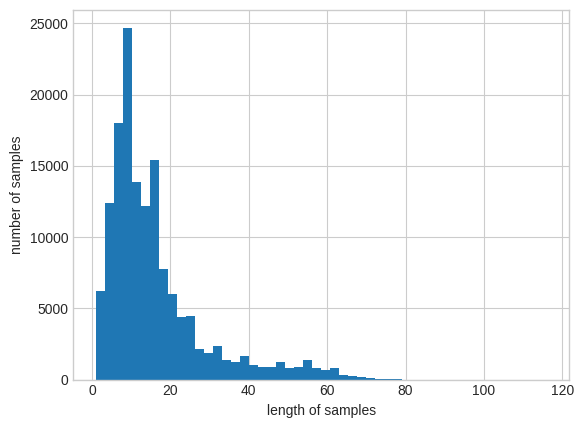

In [31]:
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [32]:
max_len = 60

In [33]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

#### 모델 구축 및 학습

*   감정 상태 분류 모델을 선언하고 학습
*   모델은 일반적인 LSTM 모델을 사용



In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

vocab_size = 5000
max_len = 100


model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=100, input_shape=(max_len,)))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])


model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)             │ (None, 100, 100)            │         500,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_10 (LSTM)                       │ (None, 128)                 │         117,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 617,377 (2.36 MB)

 Trainable params: 617,377 (2.36 MB)

 Non-trainable params: 0 (0.00 B)

In [51]:
history = model.fit(X_train, y_train, epochs=15, batch_size=60, validation_split=0.2)

Epoch 1/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - acc: 0.7640 - loss: 0.4733 - val_acc: 0.8302 - val_loss: 0.3781
Epoch 2/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - acc: 0.8515 - loss: 0.3393 - val_acc: 0.8566 - val_loss: 0.3303
Epoch 3/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - acc: 0.8680 - loss: 0.3091 - val_acc: 0.8591 - val_loss: 0.3347
Epoch 4/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - acc: 0.8761 - loss: 0.2916 - val_acc: 0.8638 - val_loss: 0.3150
Epoch 5/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - acc: 0.8846 - loss: 0.2759 - val_acc: 0.8635 - val_loss: 0.3172
Epoch 6/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - acc: 0.8906 - loss: 0.2638 - val_acc: 0.8584 - val_loss: 0.3244
Epoch 7/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - acc: 0.8975 - loss: 0.2501 - val_acc: 0.8654 - val_loss: 0.3288
Epoch 8/15
1950/1950 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - acc: 0.9033 - loss: 0.2402 - val_acc: 0.8678 - val_loss: 0.3158
Epoch 9/15
1950/1950 ━━━━━━━━━━━

#### 시각화

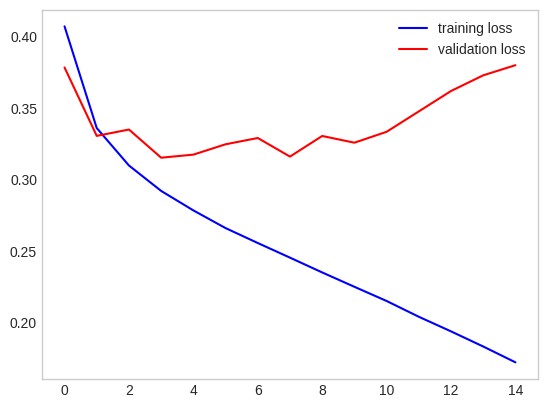

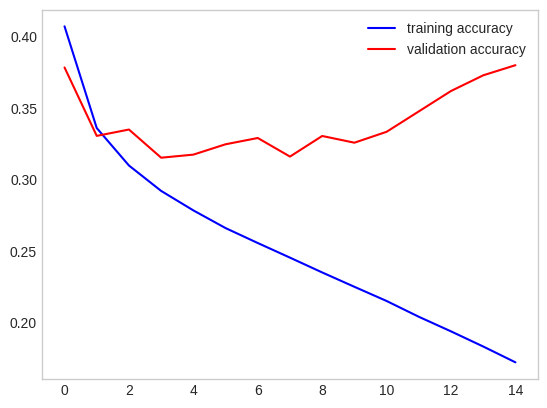

In [52]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b', label='training loss')
plt.plot(val_loss, 'r', label='validation loss')
plt.legend()
plt.grid()

plt.figure()
plt.plot(loss, 'b', label='training accuracy')
plt.plot(val_loss, 'r', label='validation accuracy')
plt.legend()
plt.grid()

plt.show()

#### 감정 예측

In [53]:
def sentiment_predict(new_sentence):
  new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
  new_sequences = tokenizer.texts_to_sequences([new_token])
  new_pad = pad_sequences(new_sequences, maxlen=max_len)
  score = float(model.predict(new_pad))

  if score > 0.5:
    print("{} -> 긍정({:.2f}%)".format(new_sentence, score*100))

  else:
    print("{} -> 부정({:.2f}%)".format(new_sentence, (1-score)*100))

In [57]:
#긍정
sentiment_predict("정말 재미있고 흥미진진 했어요.")
sentiment_predict("간만에 몰입해서 봤어요.")
sentiment_predict("배우들 연기력이 대박이네요")

# 부정
sentiment_predict("어떻게 이렇게 재미없죠?")
sentiment_predict("감독도 별로고 배우도 별로에요")
sentiment_predict("영화 분위기도 어둡고 스토리도 지루하네요")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
정말 재미있고 흥미진진 했어요. -> 긍정(98.63%)


<ipython-input-53-2f1903d46650>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(new_pad))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
간만에 몰입해서 봤어요. -> 긍정(98.30%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
배우들 연기력이 대박이네요 -> 긍정(98.04%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
어떻게 이렇게 재미없죠? -> 부정(95.65%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
감독도 별로고 배우도 별로에요 -> 부정(99.66%)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
영화 분위기도 어둡고 스토리도 지루하네요 -> 부정(98.21%)
